In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

plt.style.use('/home/llr/ilc/shi/code/Plot_style/cepc.mplstyle')
figSize = (8, 6)

# Read Data
dataPath = "/home/llr/ilc/shi/data/SiWECAL-Prototype/Simu2025-06/CONF0/gamma/Validate/Merged_X5.0mm_Y5.0mm_Si0.45mm_layer30_in60"
inputFileName = os.path.join(dataPath, "SumE_Fit.csv")
df = pd.read_csv(inputFileName)

particleEnergy       = df["ParticleEnergy"].to_numpy()
peakGauss            = df["Peak_Gauss"].to_numpy()
peakGaussErr         = df["Peak_Gauss_Error"].to_numpy()
resGauss             = df["Res_Gauss"].to_numpy()
resGaussErr          = df["Res_Gauss_Error"].to_numpy()
peakGamma            = df["Peak_Gamma"].to_numpy()
peakGammaErr         = df["Peak_Gamma_Error"].to_numpy()
resGamma             = df["Res_Gamma"].to_numpy()
resGammaErr          = df["Res_Gamma_Error"].to_numpy()
peakLogNormal        = df["Peak_LogNormal"].to_numpy()
peakLogNormalErr     = df["Peak_LogNormal_Error"].to_numpy()
resLogNormal         = df["Res_LogNormal"].to_numpy()
resLogNormalErr      = df["Res_LogNormal_Error"].to_numpy()


Gauss Linearity Coefficients: [19.21829509 -0.31700781]
Gamma Linearity Coefficients: [19.21007411 -0.90888576]
Log-Normal Linearity Coefficients: [19.21706008 -0.77364518]


/tmp/ipykernel_1288738/2756471852.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


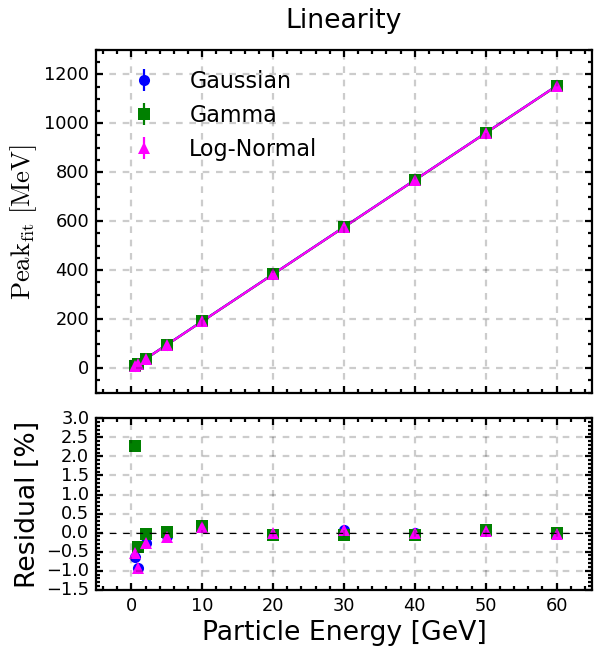

In [5]:

# Linearity and Resolution
def fitAndResidualRatio(x, y):
    """Linear fit and return coefficients, fit values, and relative residuals."""
    coeffs = np.polyfit(x, y, deg=1)
    fitVals = np.polyval(coeffs, x)
    residualRatio = (y - fitVals) / fitVals
    return coeffs, fitVals, residualRatio

coeffsGauss, fitGauss, resRatioGauss = fitAndResidualRatio(particleEnergy, peakGauss)
print("Gauss Linearity Coefficients:", coeffsGauss)
coeffsGamma, fitGamma, resRatioGamma = fitAndResidualRatio(particleEnergy, peakGamma)
print("Gamma Linearity Coefficients:", coeffsGamma)
coeffsLogN, fitLogN, resRatioLogN    = fitAndResidualRatio(particleEnergy, peakLogNormal)
print("Log-Normal Linearity Coefficients:", coeffsLogN)
#Draw
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(figSize[0], figSize[1]*1.5), 
        sharex=True,gridspec_kw={'height_ratios':[1, 0.5],'hspace': 0.1})
MarkerSize = 10
#Gaussian
ax1.errorbar(particleEnergy, peakGauss, yerr=peakGaussErr,
    fmt='o', capsize=4, label="Gaussian", color='blue',markersize=MarkerSize        
)
ax1.plot(particleEnergy, fitGauss, '-', color='blue')
# Gamma
ax1.errorbar(particleEnergy, peakGamma, yerr=peakGammaErr,
    fmt='s', capsize=4, label="Gamma", color='green', markersize=MarkerSize
)
ax1.plot(particleEnergy, fitGamma, '-', color='green')
# Log-Normal
ax1.errorbar(particleEnergy, peakLogNormal, yerr=peakLogNormalErr,
    fmt='^', capsize=4, label="Log-Normal", color='magenta', markersize=MarkerSize
)
ax1.plot(particleEnergy, fitLogN, '-', color='magenta')

ax1.set_ylabel(r"$\mathrm{Peak}_{\mathrm{fit}}\ \mathrm{[MeV]}$")
ax1.set_ylim(-100, 1300)
ax1.set_xlim(-5, 65)
ax1.set_title("Linearity")
ax1.legend(loc='upper left')
ax1.grid(True, linestyle='--', alpha=0.2)

ax2.plot(particleEnergy, resRatioGauss*100, 'o', label='Gaussian', color='blue',markersize=MarkerSize)
ax2.plot(particleEnergy, resRatioGamma*100, 's', label='Gamma', color='green',markersize=MarkerSize)
ax2.plot(particleEnergy, resRatioLogN*100, '^', label='Log-Normal', color='magenta',markersize=MarkerSize)

ax2.axhline(0, color='black', lw=1, linestyle='--')
ax2.set_xlabel("Particle Energy [GeV]")
ax2.set_ylabel("Residual [%]")
ax2.grid(True, linestyle='--', alpha=0.2)

plt.tight_layout()
plt.show()


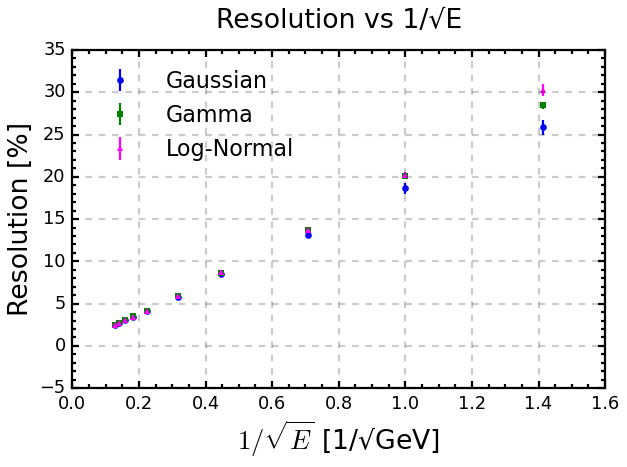

In [6]:
plt.figure(figsize=figSize)

x_vals = 1 / np.sqrt(particleEnergy)

plt.errorbar(x_vals, resGauss * 100, yerr=resGaussErr * 100,
             fmt='o', capsize=4, label='Gaussian', color='blue')
plt.errorbar(x_vals, resGamma * 100, yerr=resGammaErr * 100,
             fmt='s', capsize=4, label='Gamma', color='green')
plt.errorbar(x_vals, resLogNormal * 100, yerr=resLogNormalErr * 100,
             fmt='^', capsize=4, label='Log-Normal', color='magenta')

plt.xlabel(r"$1/\sqrt{E}$ [1/√GeV]")
plt.ylabel("Resolution [%]")
plt.title("Resolution vs 1/√E")
plt.grid(True, linestyle='--', alpha=0.2)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
